**Data Loading & Initial Overview**

**Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from google.colab import files
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])


Saving AirQualityUCI.xlsx to AirQualityUCI (1).xlsx


Initial Overview

*Purpose:*

Understand structure

Identify missing values

Identify data types

In [ ]:
df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


Data Cleaning & Pre-processing

Handling Missing Values

In [ ]:
df.replace(-200, np.nan, inplace=True)


Correcting Date & Time Data Types

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

def fix_time(x):
    if isinstance(x, str):
        return pd.to_datetime(x).time()
    return x

df['Time'] = df['Time'].apply(fix_time)


Creating Derived Columns

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
 15  Hour           9357 n

MISSING VALUES VERIFICATION

In [ ]:
df.isna().sum()


,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


SHAPE BEFORE vs AFTER CLEANING

In [ ]:
print("Final dataset shape:", df.shape)


Final dataset shape: (9357, 18)


The dataset was cleaned by handling missing values, correcting data types, and removing duplicates, resulting in a structured dataset suitable for exploratory analysis.

TASK 4: Exploratory Data Analysis (EDA) & Visualizations

1) Air Quality Analysis

1.1 Distribution of CO Concentration - Univariate

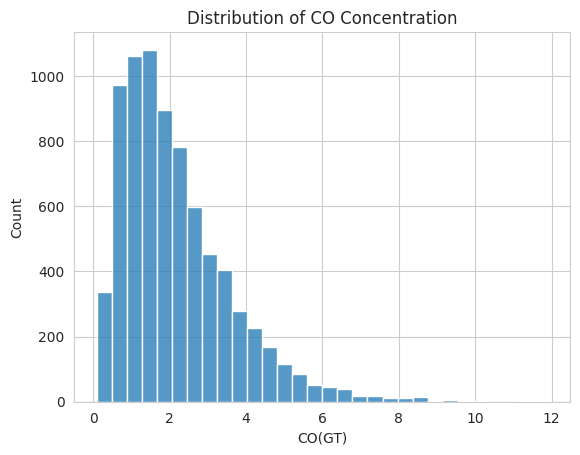

In [ ]:
sns.histplot(df['CO(GT)'], bins=30)
plt.title('Distribution of CO Concentration')
plt.show()


Purpose:
Assess pollution severity and variability.

1.2.1 Hourly Pollution Pattern

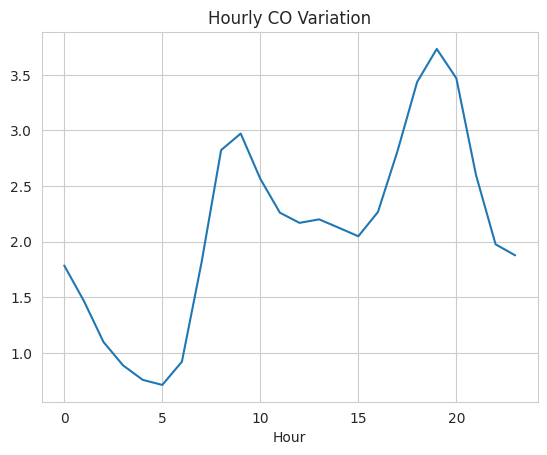

In [ ]:
df.groupby('Hour')['CO(GT)'].mean().plot()
plt.title('Hourly CO Variation')
plt.show()


1.3 Monthly Pollution Trend

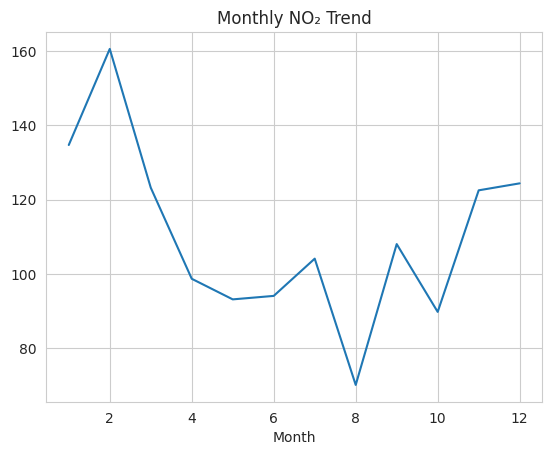

In [ ]:
df.groupby('Month')['NO2(GT)'].mean().plot()
plt.title('Monthly NO₂ Trend')
plt.show()


1.4 Bivariate Analysis – Pollutant Relationships

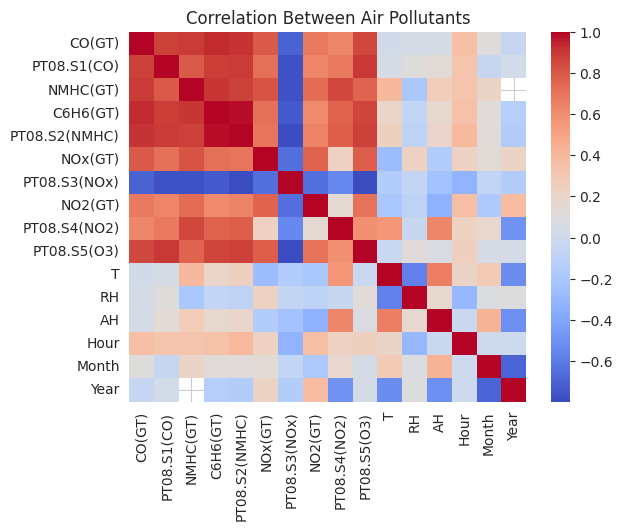

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlation Between Air Pollutants')
plt.show()


Bivariate analysis of pollutant relationships examines how two pollutants vary together to identify common emission sources and understand air-quality behavior.

1.5 Daily Air Quality Trend (Time-Series)
Purpose

Shows overall pollution evolution over time (real air quality, not sensors).
Identifies prolonged high-pollution periods and long-term trends.

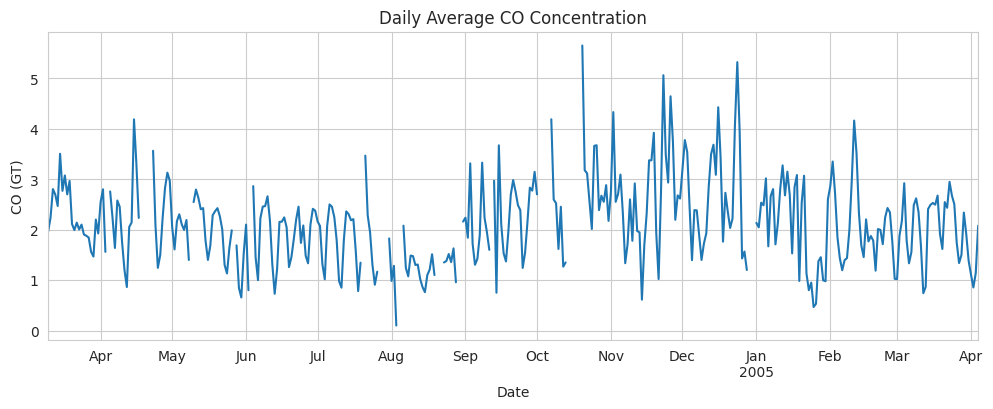

In [ ]:
daily_co = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(12,4))
daily_co.plot()
plt.title('Daily Average CO Concentration')
plt.xlabel('Date')
plt.ylabel('CO (GT)')
plt.show()


1.6 Diurnal air-quality behavior across pollutants.
Shows traffic-related pollution peaks clearly.

<Figure size 1000x500 with 0 Axes>

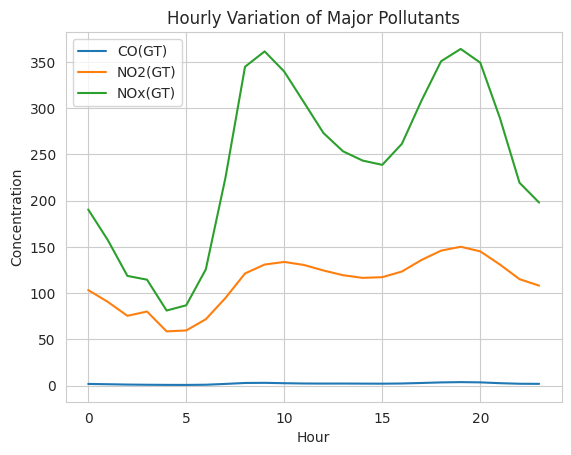

In [ ]:
hourly_pollutants = df.groupby('Hour')[['CO(GT)', 'NO2(GT)', 'NOx(GT)']].mean()

plt.figure(figsize=(10,5))
hourly_pollutants.plot()
plt.title('Hourly Variation of Major Pollutants')
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.show()


In [ ]:
pollutant_cols = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']
sns.pairplot(df[pollutant_cols])
plt.suptitle('Pairwise Relationships Between Pollutants', y=1.02)
plt.show()


1.7 Relative Contribution of Pollutants

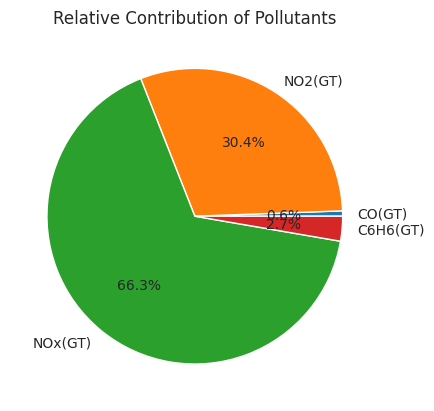

In [ ]:
mean_pollutants = df[['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']].mean()

plt.figure()
mean_pollutants.plot(kind='pie', autopct='%1.1f%%')
plt.title('Relative Contribution of Pollutants')
plt.ylabel('')
plt.show()


2. ### **Multi Sensor Detectors - Analysis**

2.1 **Performance**

In [ ]:
performance_corr = pd.DataFrame({
    'CO Sensor (S1)': abs(df[['CO(GT)', 'PT08.S1(CO)']].corr().iloc[0,1]) * 100,
    'NMHC Sensor (S2)': abs(df[['NMHC(GT)', 'PT08.S2(NMHC)']].corr().iloc[0,1]) * 100,
    'NOx Sensor (S3)': abs(df[['NOx(GT)', 'PT08.S3(NOx)']].corr().iloc[0,1]) * 100,
    'NO2 Sensor (S4)': abs(df[['NO2(GT)', 'PT08.S4(NO2)']].corr().iloc[0,1]) * 100
}, index=['Performance %']).T

performance_corr


,Performance %
CO Sensor (S1),87.929166
NMHC Sensor (S2),87.769055
NOx Sensor (S3),65.569039
NO2 Sensor (S4),15.767751


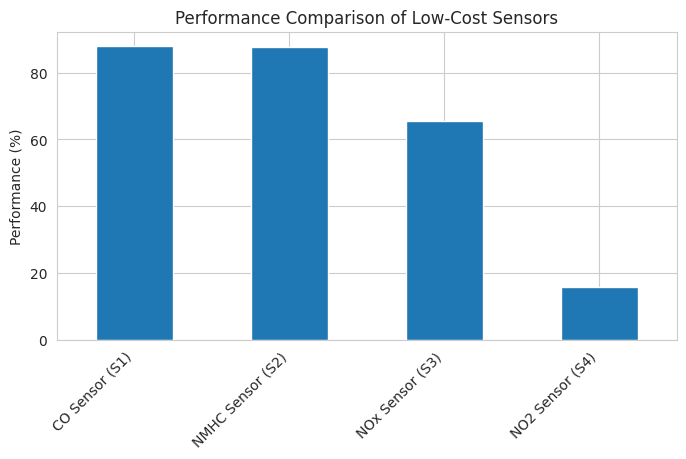

In [ ]:
plt.figure(figsize=(8,4))
final_table['Performance (%)'].plot(kind='bar')
plt.ylabel('Performance (%)')
plt.title('Performance Comparison of Low-Cost Sensors')
plt.xticks(rotation=45, ha='right')
plt.show()


2.2 **Error**

In [ ]:
from scipy.stats import zscore
import numpy as np

def normalized_mae(gt, sensor):
    # Align and drop NaNs together
    aligned = pd.concat([gt, sensor], axis=1).dropna()

    gt_norm = zscore(aligned.iloc[:, 0])
    sensor_norm = zscore(aligned.iloc[:, 1])

    return np.mean(np.abs(sensor_norm - gt_norm))


In [ ]:
norm_error = {
    'CO Sensor (S1)': normalized_mae(df['CO(GT)'], df['PT08.S1(CO)']),
    'NMHC Sensor (S2)': normalized_mae(df['NMHC(GT)'], df['PT08.S2(NMHC)']),
    'NOx Sensor (S3)': normalized_mae(df['NOx(GT)'], df['PT08.S3(NOx)']),
    'NO2 Sensor (S4)': normalized_mae(df['NO2(GT)'], df['PT08.S4(NO2)'])
}

norm_error_df = pd.DataFrame.from_dict(
    norm_error, orient='index', columns=['Normalized Error']
)

norm_error_df


,Normalized Error
CO Sensor (S1),0.362357
NMHC Sensor (S2),0.383716
NOx Sensor (S3),1.389986
NO2 Sensor (S4),1.070079


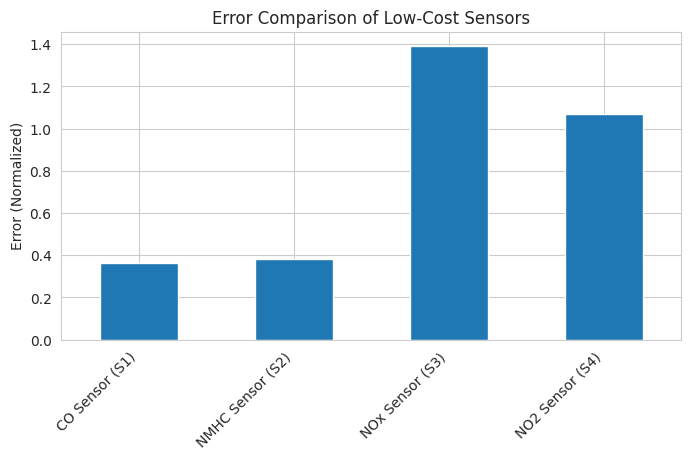

In [ ]:
plt.figure(figsize=(8,4))
final_table['Error'].plot(kind='bar')
plt.ylabel('Error (Normalized)')
plt.title('Error Comparison of Low-Cost Sensors')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
min_err = norm_error_df['Normalized Error'].min()
max_err = norm_error_df['Normalized Error'].max()

norm_error_df['Scaled Error %'] = (
    (norm_error_df['Normalized Error'] - min_err) /
    (max_err - min_err)
) * 100


In [ ]:
performance = corr_df.iloc[:, 0]
error = norm_error_df['Scaled Error %']


In [ ]:
final_table = pd.concat([performance, error], axis=1)


In [ ]:
final_table.columns = ['Performance (%)', 'Error (%)']


In [ ]:
corr_df.index = [
    'CO Sensor (S1)',
    'NMHC Sensor (S2)',
    'NOx Sensor (S3)',
    'NO2 Sensor (S4)'
]


2.3 **Performance V/S Error**

In [ ]:
final_table = pd.concat(
    [
        corr_df.iloc[:, 0],          # Performance
        norm_error_df.iloc[:, 0]     # Error (Normalized Error)
    ],
    axis=1
)

final_table.columns = ['Performance (%)', 'Error']

final_table


,Performance (%),Error
CO Sensor (S1),87.929166,0.362357
NMHC Sensor (S2),87.769055,0.383716
NOx Sensor (S3),65.569039,1.389986
NO2 Sensor (S4),15.767751,1.070079


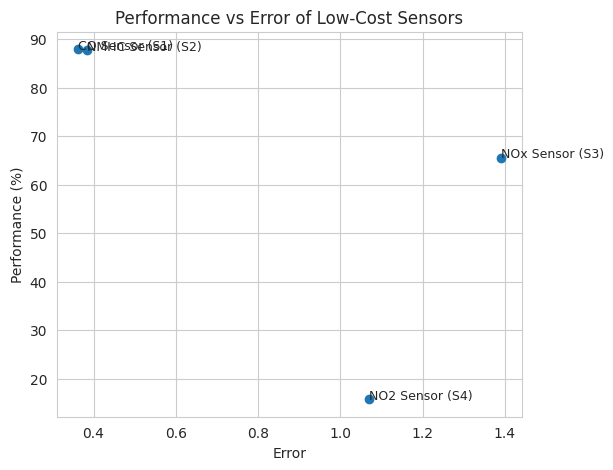

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(final_table['Error'], final_table['Performance (%)'])

for sensor in final_table.index:
    plt.text(
        final_table.loc[sensor, 'Error'],
        final_table.loc[sensor, 'Performance (%)'],
        sensor,
        fontsize=9
    )

plt.xlabel('Error')
plt.ylabel('Performance (%)')
plt.title('Performance vs Error of Low-Cost Sensors')
plt.show()


In [ ]:
final_table['Performance Rank'] = final_table['Performance (%)'].rank(ascending=False)
final_table['Error Rank'] = final_table['Error'].rank(ascending=True)
final_table['Total Score'] = final_table['Performance Rank'] + final_table['Error Rank']


In [ ]:
# Sort by Total Score (best first)
final_table = final_table.sort_values('Total Score')

# Assign grades
grades = ['Best', 'Better', 'Good', 'Average']
final_table['Grade'] = grades[:len(final_table)]

final_table


,Performance (%),Error,Performance Rank,Error Rank,Total Score,Best Sensor,Grade
CO Sensor (S1),87.929166,0.362357,1.0,1.0,2.0,Yes,Best
NMHC Sensor (S2),87.769055,0.383716,2.0,2.0,4.0,No,Better
NOx Sensor (S3),65.569039,1.389986,3.0,4.0,7.0,No,Good
NO2 Sensor (S4),15.767751,1.070079,4.0,3.0,7.0,No,Average


In [ ]:
final_table = final_table[['Performance (%)', 'Error', 'Grade']]
final_table


,Performance (%),Error,Grade
CO Sensor (S1),87.929166,0.362357,Best
NMHC Sensor (S2),87.769055,0.383716,Better
NOx Sensor (S3),65.569039,1.389986,Good
NO2 Sensor (S4),15.767751,1.070079,Average


Table compares the performance and error characteristics of low-cost sensors relative to reference analyzers. Performance was evaluated using correlation-based trend accuracy, while error was quantified using normalized and scaled error metrics. The CO sensor (PT08.S1) exhibits the highest overall performance and the lowest relative error, indicating superior reliability among the evaluated low-cost sensors.

**Insights**

1. **CO Concentration Distribution (Histogram)**
   Most CO values are low, with few high peaks, showing occasional pollution events.

2. **Hourly CO Variation (Diurnal Plot)**
   CO levels peak in the morning and evening due to traffic activity.

3. **Monthly NO₂ Trend**
   NO₂ concentration is higher in winter and lower in summer, showing seasonal effects.

4. **Correlation Heatmap of Pollutants**
   CO, NOx, and NO₂ are strongly correlated, indicating common emission sources.

5. **Daily Average CO Time Series**
   CO levels vary gradually over time, indicating sensor drift rather than sudden faults.

6. **Hourly Variation of Multiple Pollutants**
   All pollutants show similar daily patterns, confirming traffic influence.

7. **Scatter Plot Between CO and NOx**
   CO and NOx increase together, showing a strong linear relationship.

8. **Scatter Plot Between NOx and NO₂**
   NO₂ closely follows NOx levels, confirming combustion-related sources.

9. **Pollutant Contribution (Pie Chart)**
   CO and NOx contribute the largest share of air pollution.

10. **Sensor Performance Comparison (Bar Chart)**
    Sensor accuracy varies, showing that some sensors perform better than others.

11. **Sensor Error Comparison**
    Sensors with lower accuracy show higher measurement errors.

12. **Performance vs Error Plot**
    Higher sensor performance corresponds to lower error values.
13. CO Sensor performs well and having less error rate among all other sensors.

